<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">PROJECT: STUDENT GRADE PREDICTION</span>


<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">BATCH NUMBER : DS2309</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">NAME: ABHISHEK AGNIHOTRI</span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LOADING DATASET</span>

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">TOP 5 ROWS OF DATASET</span>

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">BOTTOM FIVE ROWS OF DATASET</span>

In [4]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">SHAPES OF DATASET</span>

In [5]:
df.shape

(571, 43)

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION  MISSING OR NAN VALUES</span>

<Axes: >

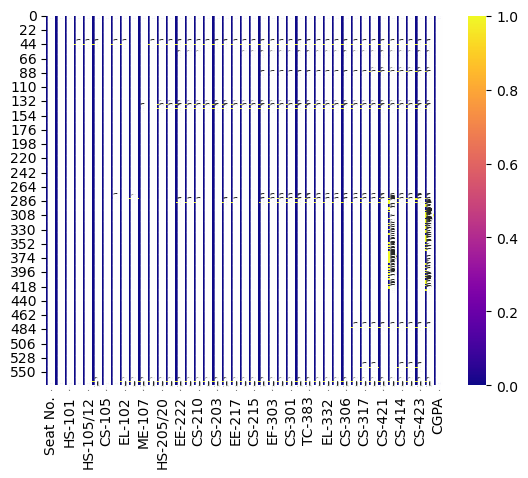

In [6]:
sns.heatmap(df.isnull(), annot=True, cmap='plasma')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">COLUMNS NAMES IN DATASET</span>

In [7]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING MISSING OR NAN VALUES</span>

In [8]:
for i in df.columns[:43]:

# Count and print NaN values for each column
        print(f"Column {i}:\n{df[i].isna().value_counts()}\n")


Column Seat No.:
False    571
Name: Seat No., dtype: int64

Column PH-121:
False    571
Name: PH-121, dtype: int64

Column HS-101:
False    571
Name: HS-101, dtype: int64

Column CY-105:
False    570
True       1
Name: CY-105, dtype: int64

Column HS-105/12:
False    570
True       1
Name: HS-105/12, dtype: int64

Column MT-111:
False    569
True       2
Name: MT-111, dtype: int64

Column CS-105:
False    571
Name: CS-105, dtype: int64

Column CS-106:
False    569
True       2
Name: CS-106, dtype: int64

Column EL-102:
False    569
True       2
Name: EL-102, dtype: int64

Column EE-119:
False    569
True       2
Name: EE-119, dtype: int64

Column ME-107:
False    569
True       2
Name: ME-107, dtype: int64

Column CS-107:
False    569
True       2
Name: CS-107, dtype: int64

Column HS-205/20:
False    566
True       5
Name: HS-205/20, dtype: int64

Column MT-222:
False    566
True       5
Name: MT-222, dtype: int64

Column EE-222:
False    564
True       7
Name: EE-222, dtype: int64

C

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">IMPLEMENTING MODE IMPUTATION IN ALL COLUMNS HAVING MISSING OR NAN VALUES</span>

In [9]:
df_imputed = df.apply(lambda col: col.fillna(col.mode()[0]))
df_imputed

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING NULL OR MISSING VALUE AFTER MODE IMPUTATION</span>

In [10]:
df_imputed

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [11]:
df_imputed.isna().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">UNIQUE VALUES IN DATSET</span>

In [12]:
for column in df_imputed.columns:
    # Check if the column is of categorical or object type
    if pd.api.types.is_categorical_dtype(df_imputed[column]) or df_imputed[column].dtype == 'O':
        # Get the first few unique values for the column
        unique_values = df_imputed[column].unique()[:43]  # Adjust the number based on your preference
        
        # Display column name and unique values
        print(f"Column: {column}\nUnique Values: {unique_values}\n")

Column: Seat No.
Unique Values: ['CS-97001' 'CS-97002' 'CS-97003' 'CS-97004' 'CS-97005' 'CS-97006'
 'CS-97007' 'CS-97008' 'CS-97009' 'CS-97010' 'CS-97011' 'CS-97012'
 'CS-97013' 'CS-97014' 'CS-97015' 'CS-97016' 'CS-97017' 'CS-97018'
 'CS-97019' 'CS-97020' 'CS-97021' 'CS-97022' 'CS-97023' 'CS-97024'
 'CS-97025' 'CS-97026' 'CS-97027' 'CS-97028' 'CS-97029' 'CS-97030'
 'CS-97031' 'CS-97032' 'CS-97033' 'CS-97034' 'CS-97035' 'CS-97036'
 'CS-97037' 'CS-97038' 'CS-97039' 'CS-97040' 'CS-97041' 'CS-97042'
 'CS-97043']

Column: PH-121
Unique Values: ['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']

Column: HS-101
Unique Values: ['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']

Column: CY-105
Unique Values: ['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 'WU' 'A+' 'F']

Column: HS-105/12
Unique Values: ['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' 'WU' 'A+' 'F']

Column: MT-111
Unique Values: ['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' 'A+' 'F' 'WU']

Column: CS-105
Unique 

Unique Values: ['A-' 'A' 'B-' 'B' 'B+' 'C+' 'D' 'D+' 'C-' 'C' 'A+' 'F' 'W' 'WU']


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">MAXIMUM CGPA SCORE</span>

In [13]:
df_imputed['CGPA'].max()

3.985

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">MINIMUM CGPA SCORE</span>

In [14]:
df_imputed['CGPA'].min()

0.8

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DISTRIBUTING MAX AND MIN CGPA BETWEEN 14 UNIQUE GRADES FOR DATA ANALYSIS</span>

In [15]:
grades_map={
    'A-': 3.5,
    'A': 3.7,
    'B-': 2.7,
    'B': 3.0,
    'B+': 3.3,
    'D-': 1.2,
    'C+': 2.3,
    'D': 1.3,
    'D+': 1.7,
    'C-': 2.0,
    'C': 2.3,
    'A+': 4.0,
    'F': 0.5,
    'W': 0.0,
    'WU': 0.0
}

columnsToconvert=df_imputed.columns[1:43]

df_imputed[columnsToconvert] = df_imputed[columnsToconvert].replace(grades_map)
print(df_imputed.head(5))


   Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0  CS-97001     2.7     1.7     2.0        2.3     2.0     1.7     1.3   
1  CS-97002     3.7     1.3     1.7        1.3     2.7     2.3     1.3   
2  CS-97003     3.7     3.0     3.7        2.7     3.3     3.7     2.7   
3  CS-97004     1.3     2.3     1.7        1.3     1.3     3.5     1.7   
4  CS-97005     3.5     3.5     3.5        3.3     3.7     3.7     3.5   

   EL-102  EE-119  ...  CS-312 CS-317  CS-403  CS-421  CS-406  CS-414  CS-419  \
0     2.0     2.7  ...     2.0    2.0     2.0     2.0     3.5     3.7     2.0   
1     3.7     1.7  ...     1.7    1.3     2.3     1.3     3.5     2.7     2.3   
2     3.3     3.5  ...     3.0    3.0     3.7     2.3     3.7     3.7     3.7   
3     2.0     1.3  ...     1.7    2.3     1.7     2.0     2.7     3.0     2.3   
4     3.3     3.7  ...     2.7    3.3     3.3     2.7     3.5     3.7     3.5   

   CS-423 CS-412   CGPA  
0     3.0    3.5  2.205  
1     2.3    3.0

In [16]:
df_imputed.head(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.7,2.0,2.3,2.0,1.7,1.3,2.0,2.7,...,2.0,2.0,2.0,2.0,3.5,3.7,2.0,3.0,3.5,2.205
1,CS-97002,3.7,1.3,1.7,1.3,2.7,2.3,1.3,3.7,1.7,...,1.7,1.3,2.3,1.3,3.5,2.7,2.3,2.3,3.0,2.008
2,CS-97003,3.7,3.0,3.7,2.7,3.3,3.7,2.7,3.3,3.5,...,3.0,3.0,3.7,2.3,3.7,3.7,3.7,3.5,3.7,3.608
3,CS-97004,1.3,2.3,1.7,1.3,1.3,3.5,1.7,2.0,1.3,...,1.7,2.3,1.7,2.0,2.7,3.0,2.3,2.3,2.3,1.906
4,CS-97005,3.5,3.5,3.5,3.3,3.7,3.7,3.5,3.3,3.7,...,2.7,3.3,3.3,2.7,3.5,3.7,3.5,3.5,3.7,3.448


In [17]:
df_imputed.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,3.0,3.7,3.7,3.5,4.0,3.7,3.5,3.5,4.0,...,3.5,3.5,3.7,3.7,3.7,3.3,3.3,3.0,3.7,3.798
567,CS-97568,4.0,3.7,3.7,3.7,3.7,3.7,3.7,3.5,3.7,...,3.3,3.3,3.7,3.7,3.5,3.0,3.5,2.3,3.5,3.772
568,CS-97569,3.0,3.7,3.5,3.3,3.7,3.7,3.7,3.7,3.7,...,3.5,3.0,3.7,3.3,3.7,2.3,3.3,3.5,3.5,3.470
569,CS-97570,3.7,3.3,1.3,3.7,1.3,1.7,2.7,2.0,2.7,...,1.3,3.0,3.0,2.0,1.3,2.3,3.0,2.7,2.3,2.193
570,CS-97571,2.3,1.3,1.3,2.3,2.3,1.7,3.0,2.3,2.3,...,2.3,2.3,2.7,1.3,0.5,2.0,3.3,1.3,2.0,1.753


In [18]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    float64
 2   HS-101     571 non-null    float64
 3   CY-105     571 non-null    float64
 4   HS-105/12  571 non-null    float64
 5   MT-111     571 non-null    float64
 6   CS-105     571 non-null    float64
 7   CS-106     571 non-null    float64
 8   EL-102     571 non-null    float64
 9   EE-119     571 non-null    float64
 10  ME-107     571 non-null    float64
 11  CS-107     571 non-null    object 
 12  HS-205/20  571 non-null    float64
 13  MT-222     571 non-null    float64
 14  EE-222     571 non-null    float64
 15  MT-224     571 non-null    float64
 16  CS-210     571 non-null    float64
 17  CS-211     571 non-null    float64
 18  CS-203     571 non-null    object 
 19  CS-214     571 non-null    object 
 20  EE-217    

In [19]:
df_imputed['CS-214'].isnull().value_counts()

False    571
Name: CS-214, dtype: int64

Skipping CS-107 as it contains non-numeric values.
Skipping CS-203 as it contains non-numeric values.
Skipping CS-214 as it contains non-numeric values.


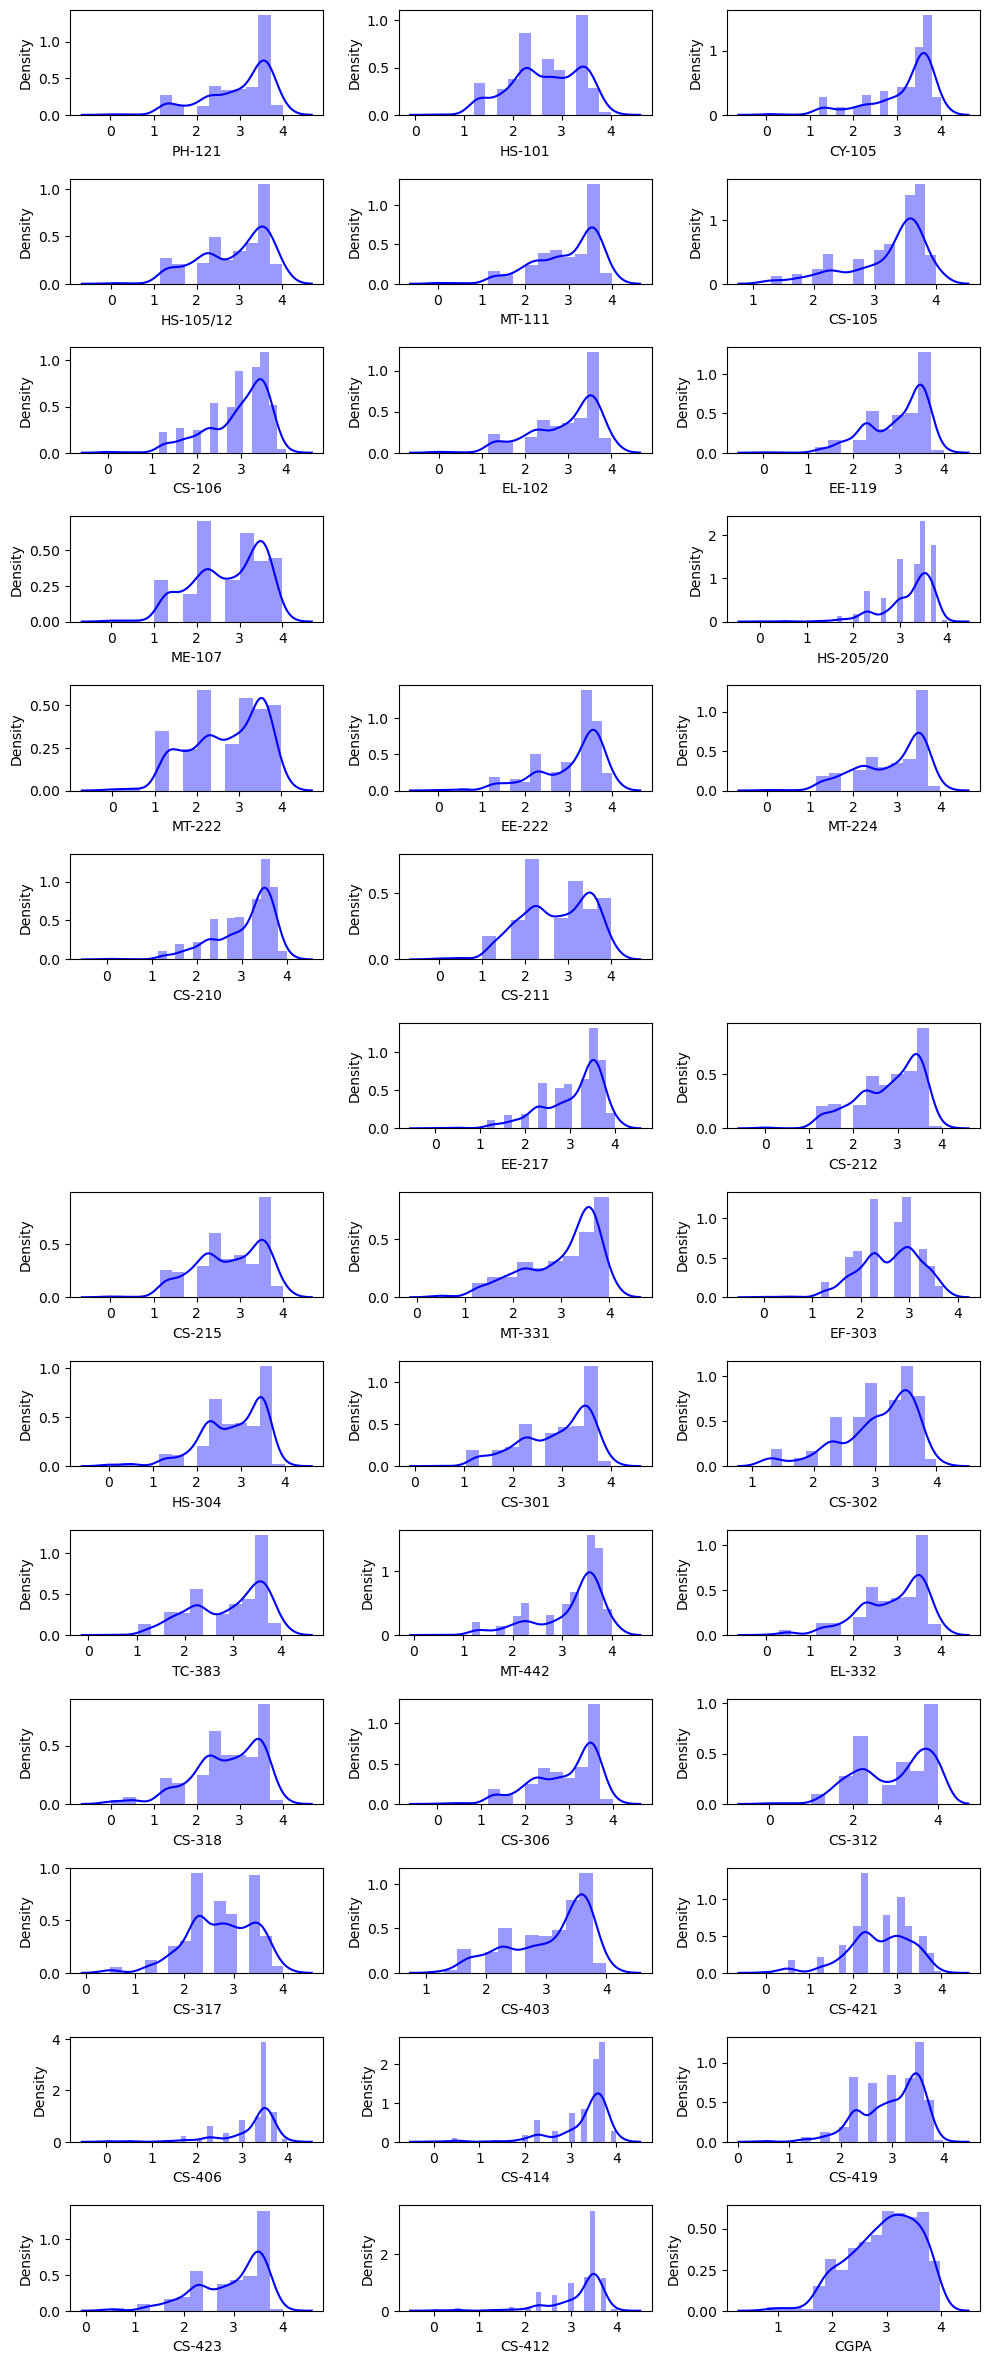

In [20]:
plt.figure(figsize=(10, 25), facecolor='white')
plotnum = 1

for i in df_imputed.columns[1:43]:
    if plotnum < 45:
        # Check if the column contains numeric values
        if df_imputed[i].dtype in ['float64', 'int64']:
            ax = plt.subplot(15, 3, plotnum)
            sns.distplot(df_imputed[i], color='b')
            plt.xlabel(i, fontsize=10)
        else:
            print(f"Skipping {i} as it contains non-numeric values.")
    plotnum += 1

plt.tight_layout()
plt.show()


In [21]:
df_imputed.skew()

PH-121      -0.961673
HS-101      -0.291325
CY-105      -1.510167
HS-105/12   -0.633137
MT-111      -0.936220
CS-105      -1.218891
CS-106      -1.094887
EL-102      -0.907468
EE-119      -0.883109
ME-107      -0.488876
HS-205/20   -1.714815
MT-222      -0.476287
EE-222      -1.217981
MT-224      -0.767702
CS-210      -1.235794
CS-211      -0.373827
EE-217      -1.131831
CS-212      -0.753370
CS-215      -0.440502
MT-331      -0.942589
EF-303      -0.446892
HS-304      -1.012979
CS-301      -0.696572
CS-302      -1.046331
TC-383      -0.521445
MT-442      -1.243969
EL-332      -0.907626
CS-318      -0.847244
CS-306      -0.876454
CS-312      -0.504550
CS-317      -0.453121
CS-403      -0.771192
CS-421      -0.718153
CS-406      -2.376734
CS-414      -2.353634
CS-419      -0.897841
CS-423      -0.949651
CS-412      -2.360902
CGPA        -0.497203
dtype: float64

<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION:CORRELATION</span>

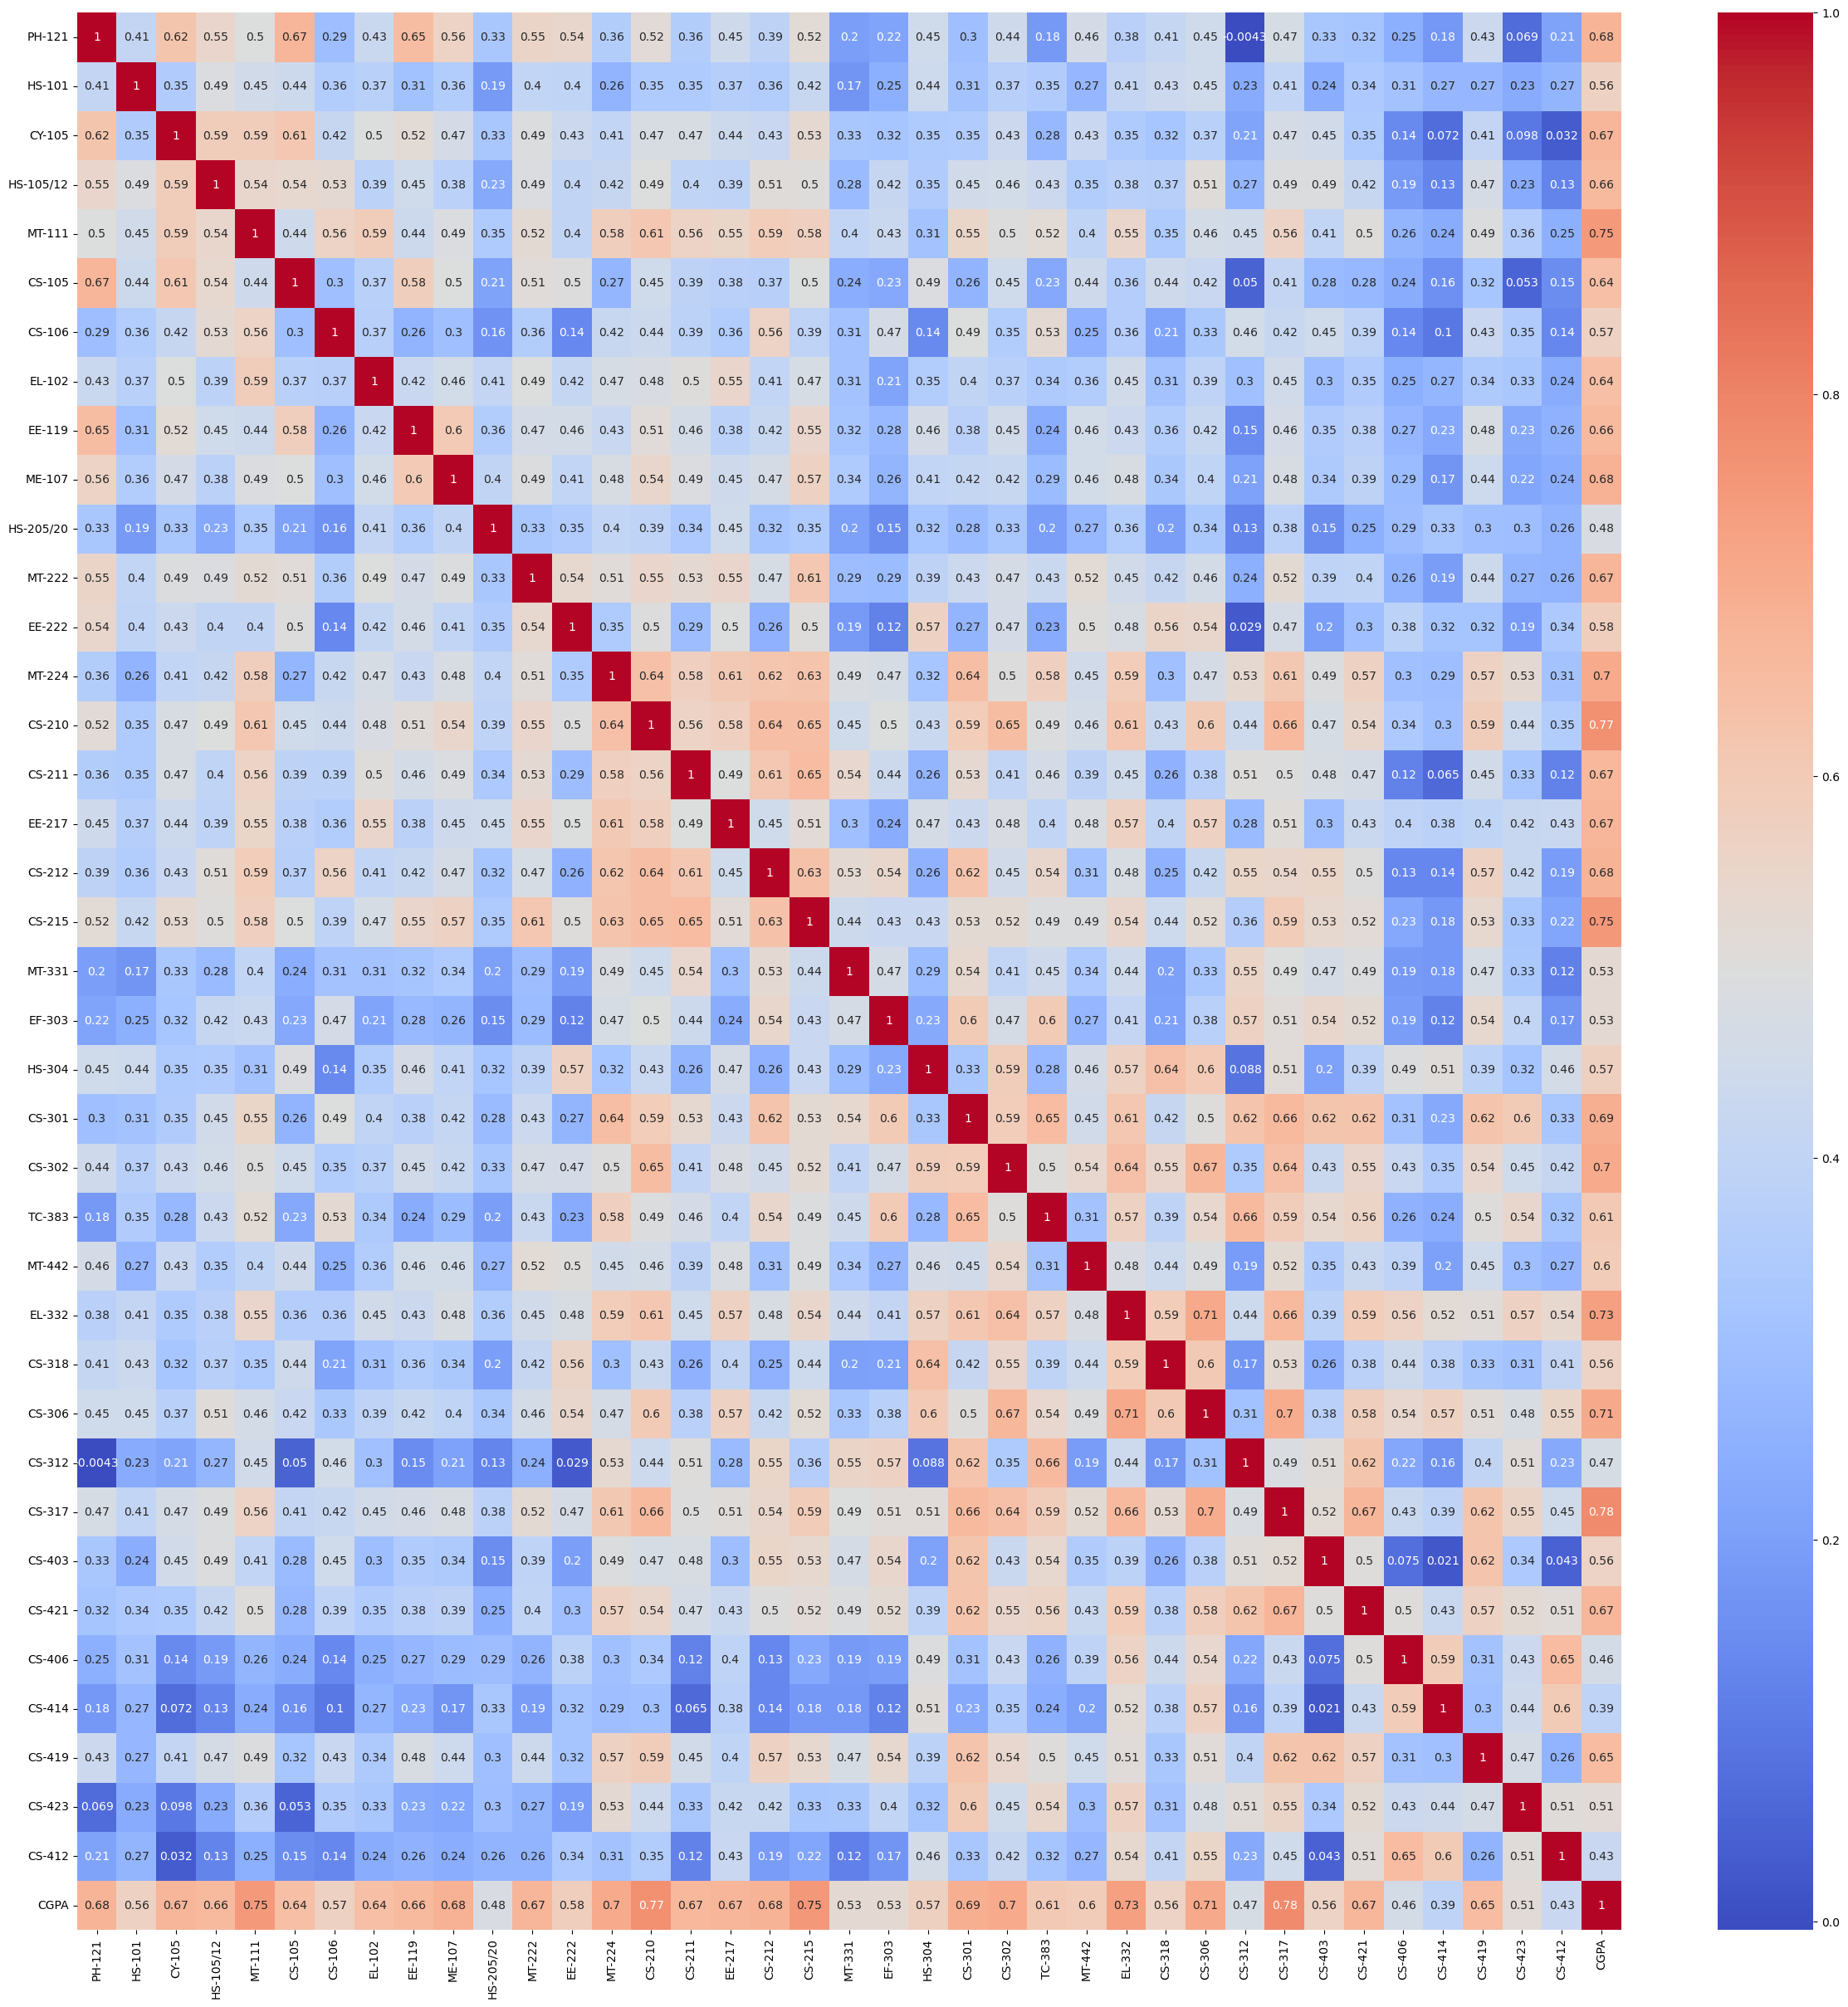

In [22]:
plt.figure(figsize=(30,30), facecolor='white')
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm')
plt.show()

In [23]:
df_imputed.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.410255,0.622118,0.547009,0.497616,0.671880,0.294776,0.427333,0.650201,0.563309,...,-0.004252,0.472652,0.327664,0.319863,0.250649,0.176478,0.434905,0.068765,0.209602,0.678137
HS-101,0.410255,1.000000,0.351837,0.488706,0.453937,0.438281,0.356447,0.373603,0.308640,0.356231,...,0.233653,0.405830,0.241289,0.337537,0.310340,0.273574,0.274093,0.234357,0.265414,0.564953
CY-105,0.622118,0.351837,1.000000,0.585788,0.586146,0.611986,0.417426,0.496318,0.520170,0.466346,...,0.212602,0.469414,0.452299,0.345326,0.143722,0.072165,0.408358,0.097950,0.032242,0.672799
HS-105/12,0.547009,0.488706,0.585788,1.000000,0.542849,0.535659,0.526901,0.386531,0.450260,0.382697,...,0.268476,0.492909,0.490730,0.418831,0.186178,0.132611,0.470306,0.231355,0.129112,0.655888
MT-111,0.497616,0.453937,0.586146,0.542849,1.000000,0.443719,0.560876,0.586025,0.435193,0.489201,...,0.452320,0.561174,0.407522,0.503327,0.264968,0.237406,0.490531,0.364260,0.250383,0.745367
CS-105,0.671880,0.438281,0.611986,0.535659,0.443719,1.000000,0.299542,0.373279,0.584108,0.497534,...,0.049555,0.409609,0.284602,0.275763,0.236046,0.157481,0.324715,0.053029,0.151855,0.642194
CS-106,0.294776,0.356447,0.417426,0.526901,0.560876,0.299542,1.000000,0.369430,0.260592,0.297899,...,0.455788,0.419985,0.449127,0.394516,0.137217,0.101403,0.425245,0.350383,0.135286,0.569205
EL-102,0.427333,0.373603,0.496318,0.386531,0.586025,0.373279,0.369430,1.000000,0.423660,0.455319,...,0.302959,0.454300,0.296546,0.349786,0.247584,0.267395,0.341014,0.328594,0.235062,0.642304
EE-119,0.650201,0.308640,0.520170,0.450260,0.435193,0.584108,0.260592,0.423660,1.000000,0.600480,...,0.147260,0.463899,0.350644,0.378752,0.271462,0.227070,0.477265,0.230595,0.258237,0.658592
ME-107,0.563309,0.356231,0.466346,0.382697,0.489201,0.497534,0.297899,0.455319,0.600480,1.000000,...,0.207006,0.476407,0.344093,0.391495,0.286329,0.170996,0.440875,0.217772,0.240872,0.683957


<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION: OUTLIERS</span>

Skipping CS-107 as it contains non-numeric values.
Skipping CS-203 as it contains non-numeric values.
Skipping CS-214 as it contains non-numeric values.


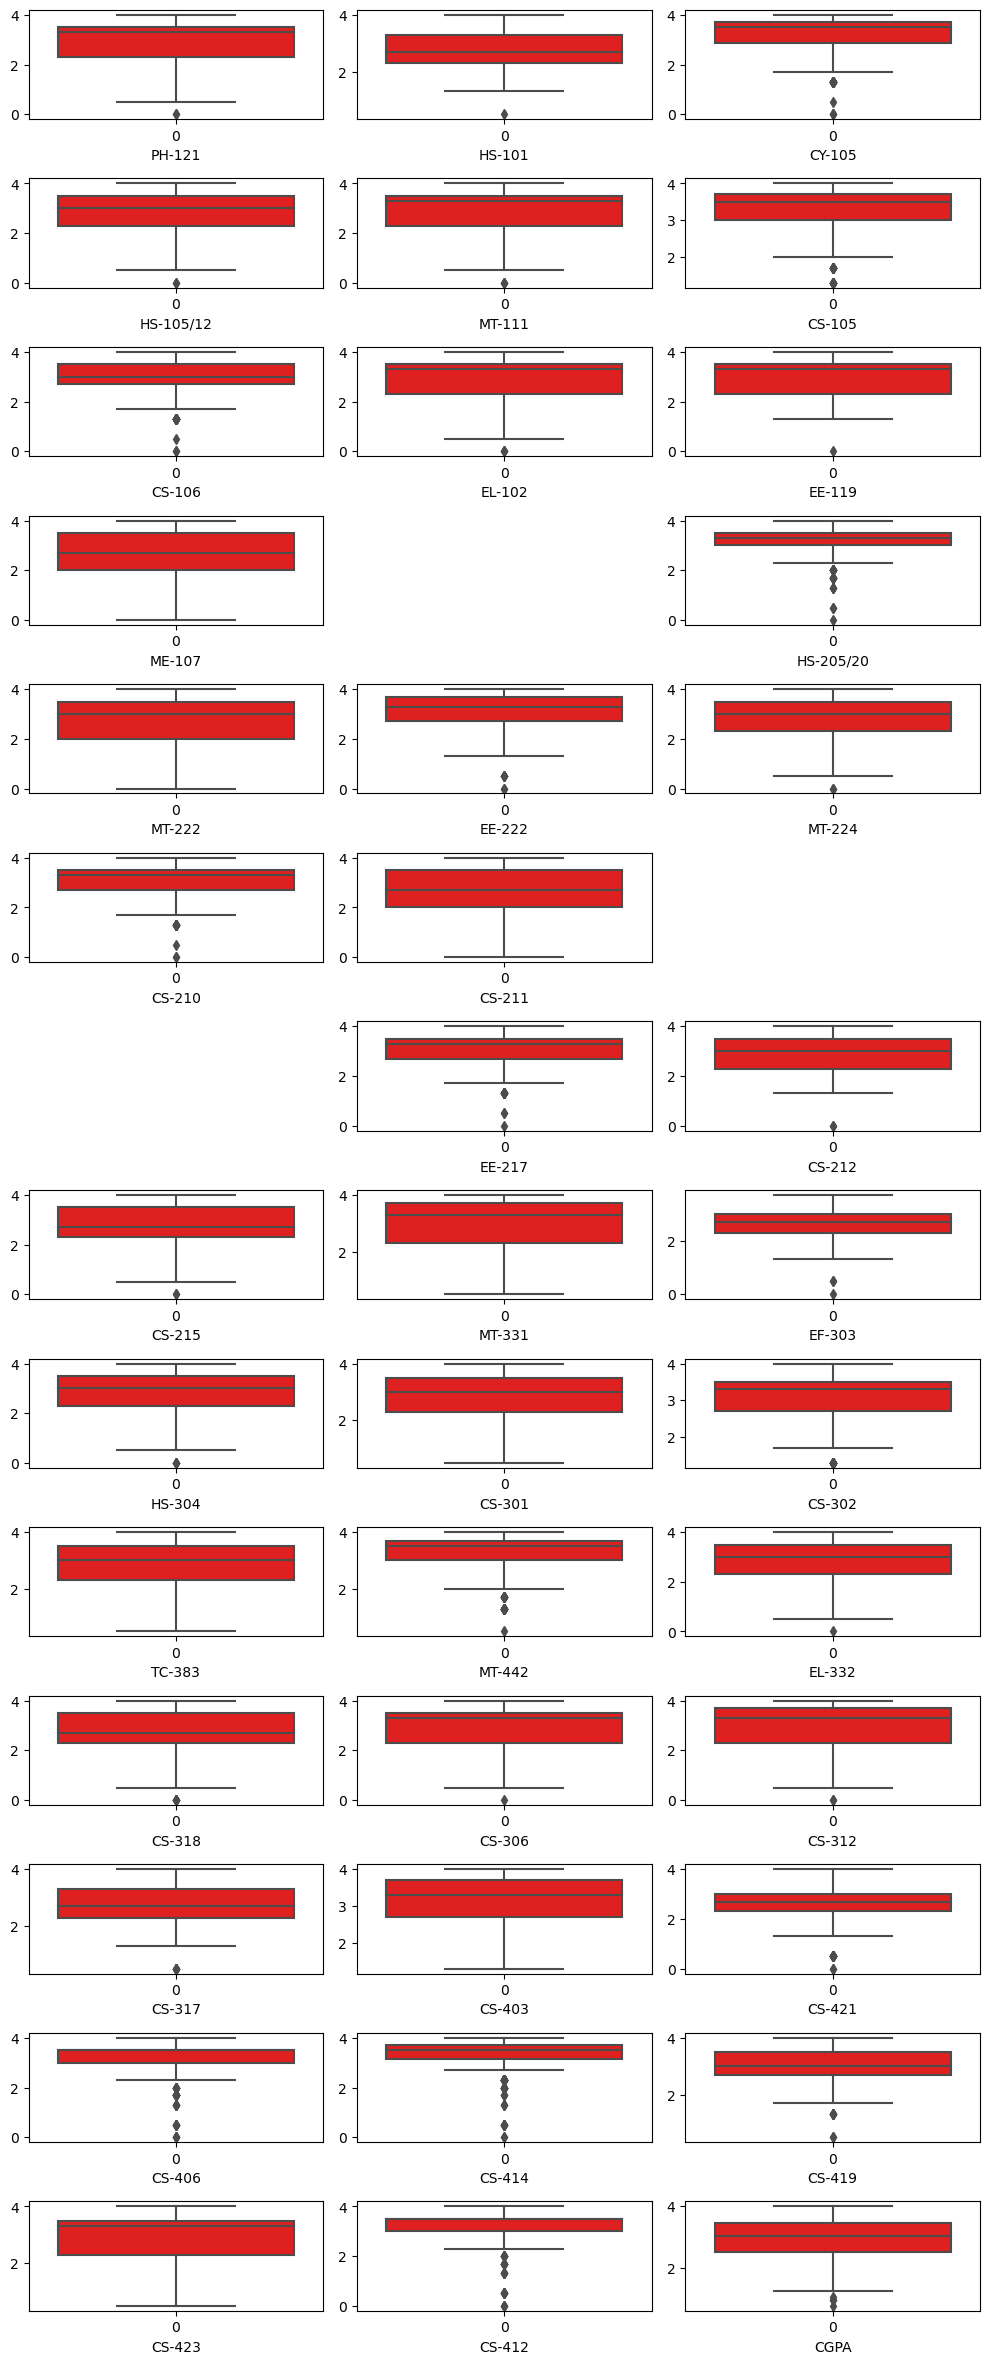

In [24]:
plt.figure(figsize=(10, 25), facecolor='white')
plotnum = 1

for i in df_imputed.columns[1:43]:
    if plotnum < 45:
        # Check if the column contains numeric values
        if df_imputed[i].dtype in ['float64', 'int64']:
            ax = plt.subplot(15, 3, plotnum)
            sns.boxplot(df_imputed[i], color='r')
            plt.xlabel(i, fontsize=10)
        else:
            print(f"Skipping {i} as it contains non-numeric values.")
    plotnum += 1

plt.tight_layout()
plt.show()


In [25]:
import pandas as pd

# Assuming 'df' is the name of your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Extract non-numeric data from the entire DataFrame
non_numeric_data = df_imputed.select_dtypes(exclude=['number'])

# Display the non-numeric data
print(non_numeric_data)



     Seat No. CS-107 CS-203 CS-214
0    CS-97001    2.0    1.7    1.3
1    CS-97002    3.3    2.3    1.3
2    CS-97003    2.7    3.7    3.5
3    CS-97004    1.3    2.3    1.3
4    CS-97005    2.3    3.7    3.5
..        ...    ...    ...    ...
566  CS-97567    4.0    4.0    3.7
567  CS-97568    4.0    4.0    4.0
568  CS-97569    4.0    3.3    3.0
569  CS-97570    4.0    2.7    2.3
570  CS-97571    2.7    3.0    1.7

[571 rows x 4 columns]


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DROPPED THREE COLUMNS FROM DATAFRAME AND MAKE NEW DATAFRAME:df2</span>

In [30]:
column_to_drop=['CS-107','CS-203','CS-214']
df2=df_imputed.drop(columns=column_to_drop)

In [31]:
df2

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.7,2.0,2.3,2.0,1.7,1.3,2.0,2.7,...,2.0,2.0,2.0,2.0,3.5,3.7,2.0,3.0,3.5,2.205
1,CS-97002,3.7,1.3,1.7,1.3,2.7,2.3,1.3,3.7,1.7,...,1.7,1.3,2.3,1.3,3.5,2.7,2.3,2.3,3.0,2.008
2,CS-97003,3.7,3.0,3.7,2.7,3.3,3.7,2.7,3.3,3.5,...,3.0,3.0,3.7,2.3,3.7,3.7,3.7,3.5,3.7,3.608
3,CS-97004,1.3,2.3,1.7,1.3,1.3,3.5,1.7,2.0,1.3,...,1.7,2.3,1.7,2.0,2.7,3.0,2.3,2.3,2.3,1.906
4,CS-97005,3.5,3.5,3.5,3.3,3.7,3.7,3.5,3.3,3.7,...,2.7,3.3,3.3,2.7,3.5,3.7,3.5,3.5,3.7,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,3.0,3.7,3.7,3.5,4.0,3.7,3.5,3.5,4.0,...,3.5,3.5,3.7,3.7,3.7,3.3,3.3,3.0,3.7,3.798
567,CS-97568,4.0,3.7,3.7,3.7,3.7,3.7,3.7,3.5,3.7,...,3.3,3.3,3.7,3.7,3.5,3.0,3.5,2.3,3.5,3.772
568,CS-97569,3.0,3.7,3.5,3.3,3.7,3.7,3.7,3.7,3.7,...,3.5,3.0,3.7,3.3,3.7,2.3,3.3,3.5,3.5,3.470
569,CS-97570,3.7,3.3,1.3,3.7,1.3,1.7,2.7,2.0,2.7,...,1.3,3.0,3.0,2.0,1.3,2.3,3.0,2.7,2.3,2.193


In [32]:
df2.shape

(571, 40)

In [33]:
df_imputed.shape

(571, 43)

In [34]:
df2.skew()

PH-121      -0.961673
HS-101      -0.291325
CY-105      -1.510167
HS-105/12   -0.633137
MT-111      -0.936220
CS-105      -1.218891
CS-106      -1.094887
EL-102      -0.907468
EE-119      -0.883109
ME-107      -0.488876
HS-205/20   -1.714815
MT-222      -0.476287
EE-222      -1.217981
MT-224      -0.767702
CS-210      -1.235794
CS-211      -0.373827
EE-217      -1.131831
CS-212      -0.753370
CS-215      -0.440502
MT-331      -0.942589
EF-303      -0.446892
HS-304      -1.012979
CS-301      -0.696572
CS-302      -1.046331
TC-383      -0.521445
MT-442      -1.243969
EL-332      -0.907626
CS-318      -0.847244
CS-306      -0.876454
CS-312      -0.504550
CS-317      -0.453121
CS-403      -0.771192
CS-421      -0.718153
CS-406      -2.376734
CS-414      -2.353634
CS-419      -0.897841
CS-423      -0.949651
CS-412      -2.360902
CGPA        -0.497203
dtype: float64

In [35]:
df2.skew().abs()

PH-121       0.961673
HS-101       0.291325
CY-105       1.510167
HS-105/12    0.633137
MT-111       0.936220
CS-105       1.218891
CS-106       1.094887
EL-102       0.907468
EE-119       0.883109
ME-107       0.488876
HS-205/20    1.714815
MT-222       0.476287
EE-222       1.217981
MT-224       0.767702
CS-210       1.235794
CS-211       0.373827
EE-217       1.131831
CS-212       0.753370
CS-215       0.440502
MT-331       0.942589
EF-303       0.446892
HS-304       1.012979
CS-301       0.696572
CS-302       1.046331
TC-383       0.521445
MT-442       1.243969
EL-332       0.907626
CS-318       0.847244
CS-306       0.876454
CS-312       0.504550
CS-317       0.453121
CS-403       0.771192
CS-421       0.718153
CS-406       2.376734
CS-414       2.353634
CS-419       0.897841
CS-423       0.949651
CS-412       2.360902
CGPA         0.497203
dtype: float64

<span style="color:magenta;font-size: 22px;font-family: verdana;font-weight: bold ">NEED TO CORRECT SKEWNESS OF SOME COLUMNS</span>

In [45]:
from scipy.stats import boxcox


In [55]:
# Filter only numeric columns
numeric_columns = df2.select_dtypes(include=np.number).columns

# Correct skewness using Box-Cox transformation
skewed_columns_mask = np.array(df2[numeric_columns].skew().abs() > 0.5)
skewed_columns = numeric_columns[np.where(skewed_columns_mask)].tolist()

# Calculate the constant using a dictionary comprehension
constants = {col: abs(df2[col].min()) + 1 for col in skewed_columns}

# Apply Box-Cox transformation with the correct constant for each column
for col in skewed_columns:
    constant = constants[col]
    transformed_col, _ = boxcox(df2[col] + constant)
    df2[col] = transformed_col

# Display the DataFrame after correcting skewness
print("\nDataFrame after correcting skewness:")
print(df2)
print("\nSkewness of each column after transformation:")
print(df2[numeric_columns].skew())


DataFrame after correcting skewness:
     Seat No.     PH-121  HS-101      CY-105  HS-105/12     MT-111  \
0    CS-97001  17.429525     1.7   27.065027   6.058617   7.343297   
1    CS-97002  36.520755     1.3   17.034263   2.445643  13.476470   
2    CS-97003  36.520755     3.0  191.974898   7.964245  20.692390   
3    CS-97004   3.834373     2.3   17.034263   2.445643   3.308532   
4    CS-97005  31.941613     3.5  158.865712  11.340533  26.629121   
..        ...        ...     ...         ...        ...        ...   
566  CS-97567  22.198880     3.7  191.974898  12.607543  31.720464   
567  CS-97568  44.178546     3.7  191.974898  13.946705  26.629121   
568  CS-97569  22.198880     3.7  158.865712  11.340533  26.629121   
569  CS-97570  36.520755     3.3    8.368019  13.946705   3.308532   
570  CS-97571  12.196510     1.3    8.368019   6.058617   9.692291   

          CS-105     CS-106     EL-102     EE-119  ...    CS-312  CS-317  \
0     537.775477   4.752520   7.285929  23.21

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">DISTRIBUTION PLOTS:AFTER CORRECTION OF SKEWNESS</span>

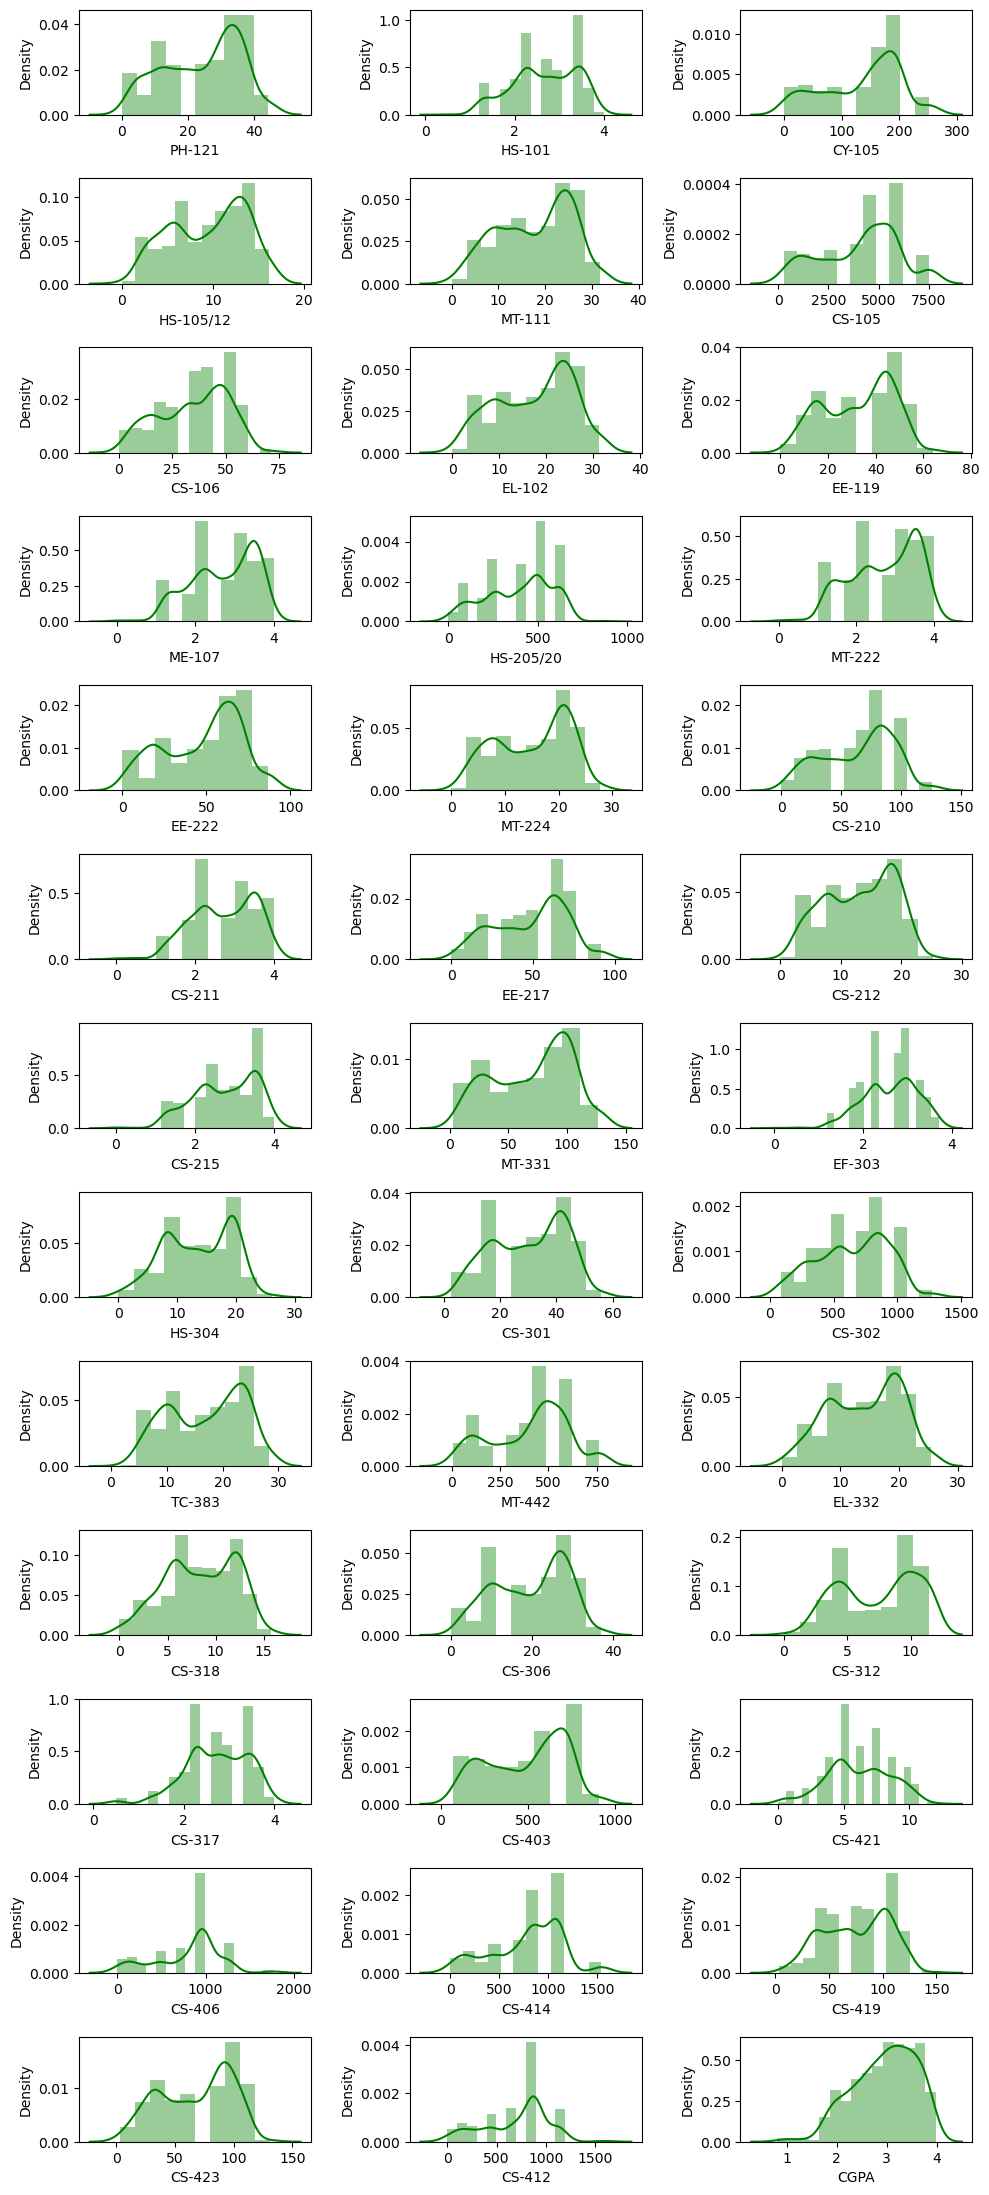

In [57]:
plt.figure(figsize=(10, 25), facecolor='white')
plotnum = 1

for i in df2.columns[1:43]:
    if plotnum < 45:
        # Check if the column contains numeric values
        if df2[i].dtype in ['float64', 'int64']:
            ax = plt.subplot(15, 3, plotnum)
            sns.distplot(df2[i], color='g')
            plt.xlabel(i, fontsize=10)
        else:
            print(f"Skipping {i} as it contains non-numeric values.")
    plotnum += 1

plt.tight_layout()
plt.show()

In [58]:
df2.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,24.171550,2.666550,135.651550,9.453231,17.796225,4075.833057,34.922042,17.562842,32.731151,2.725919,...,7.431736,2.730648,492.085887,6.140881,798.667003,785.987845,75.382331,67.482935,704.366842,2.954888
std,11.576836,0.719955,67.577327,4.153529,7.979718,1945.065576,16.239467,8.107882,14.588012,0.815697,...,3.092046,0.689767,222.338682,2.442579,371.217995,361.082634,30.556290,30.409911,325.650546,0.620552
min,0.000000,0.500000,0.000000,0.000000,0.000000,291.673863,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.500000,71.978686,0.000000,0.000000,0.000000,3.241319,3.114553,0.000000,0.800000
25%,12.196510,2.300000,81.404463,6.058617,9.692291,2754.734257,25.340936,9.608422,15.757164,2.000000,...,4.785510,2.300000,318.303128,4.933313,491.317527,548.869388,54.373810,34.267824,450.950897,2.538000
50%,27.761525,2.700000,158.865712,9.573540,20.692390,4648.769038,33.170894,20.463591,38.506039,2.700000,...,8.385897,2.700000,531.300915,6.328225,965.003805,851.809503,70.262460,80.126376,878.379877,3.029000
75%,31.941613,3.300000,191.974898,12.607543,23.542534,5659.756361,49.764306,23.272311,44.856603,3.500000,...,10.079920,3.300000,725.721418,7.478710,965.003805,1088.420232,103.881922,92.916436,878.379877,3.451000
max,44.178546,4.000000,251.302360,16.092424,31.720464,7512.563613,71.472124,31.325216,63.860209,4.000000,...,11.445134,4.000000,904.762113,11.959063,1764.995128,1542.638330,147.912843,131.266793,1594.636324,3.985000


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DROPPED  COLUMNS "SEAT NO" FROM DATAFRAME AND MAKE NEW DATAFRAME:df3</span>

In [61]:
df3=df2.drop(columns=['Seat No.'])

In [62]:
df3

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,17.429525,1.7,27.065027,6.058617,7.343297,537.775477,4.752520,7.285929,23.213420,2.0,...,3.883262,2.0,160.914199,3.991459,965.003805,1088.420232,27.566291,63.390310,878.379877,2.205
1,36.520755,1.3,17.034263,2.445643,13.476470,1210.546242,4.752520,26.312704,7.924923,1.3,...,3.063643,1.3,218.317005,2.141719,965.003805,282.523435,37.464675,34.267824,450.950897,2.008
2,36.520755,3.0,191.974898,7.964245,20.692390,5659.756361,25.340936,20.463591,44.856603,3.5,...,7.210359,3.0,725.721418,4.933313,1238.096827,1088.420232,120.145248,92.916436,1123.499640,3.608
3,3.834373,2.3,17.034263,2.445643,3.308532,4648.769038,8.436232,7.285929,4.519296,2.3,...,3.063643,2.3,115.998556,3.991459,314.250540,438.501073,37.464675,34.267824,151.708408,1.906
4,31.941613,3.5,158.865712,11.340533,26.629121,5659.756361,49.764306,20.463591,51.901198,3.5,...,6.116496,3.3,531.300915,6.328225,965.003805,1088.420232,103.881922,92.916436,1123.499640,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,22.198880,3.7,191.974898,12.607543,31.720464,5659.756361,49.764306,23.272311,63.860209,3.3,...,9.214845,3.5,725.721418,10.510723,1238.096827,659.237703,89.283044,63.390310,1123.499640,3.798
567,44.178546,3.7,191.974898,13.946705,26.629121,5659.756361,57.788371,23.272311,51.901198,3.7,...,8.385897,3.3,725.721418,10.510723,965.003805,438.501073,103.881922,34.267824,878.379877,3.772
568,22.198880,3.7,158.865712,11.340533,26.629121,5659.756361,57.788371,26.312704,51.901198,3.0,...,9.214845,3.0,725.721418,8.718572,1238.096827,148.175305,89.283044,92.916436,878.379877,3.470
569,36.520755,3.3,8.368019,13.946705,3.308532,537.775477,25.340936,7.285929,23.213420,2.0,...,2.099967,3.0,414.236802,3.991459,20.454265,148.175305,70.262460,49.332329,151.708408,2.193


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">SPLITTED df3 INTO INPUT AND OUTPUT OR TARGET VARIABLE</span>

<span style="color:RED;font-size: 15px;font-family: verdana;font-weight: bold ">X: INPUT OR INDEPENDENT VARIABLE</span>

In [63]:
X=df3.drop(columns=['CGPA'])
X

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,17.429525,1.7,27.065027,6.058617,7.343297,537.775477,4.752520,7.285929,23.213420,2.0,...,10.755565,3.883262,2.0,160.914199,3.991459,965.003805,1088.420232,27.566291,63.390310,878.379877
1,36.520755,1.3,17.034263,2.445643,13.476470,1210.546242,4.752520,26.312704,7.924923,1.3,...,3.537162,3.063643,1.3,218.317005,2.141719,965.003805,282.523435,37.464675,34.267824,450.950897
2,36.520755,3.0,191.974898,7.964245,20.692390,5659.756361,25.340936,20.463591,44.856603,3.5,...,27.032612,7.210359,3.0,725.721418,4.933313,1238.096827,1088.420232,120.145248,92.916436,1123.499640
3,3.834373,2.3,17.034263,2.445643,3.308532,4648.769038,8.436232,7.285929,4.519296,2.3,...,8.066556,3.063643,2.3,115.998556,3.991459,314.250540,438.501073,37.464675,34.267824,151.708408
4,31.941613,3.5,158.865712,11.340533,26.629121,5659.756361,49.764306,20.463591,51.901198,3.5,...,27.032612,6.116496,3.3,531.300915,6.328225,965.003805,1088.420232,103.881922,92.916436,1123.499640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,22.198880,3.7,191.974898,12.607543,31.720464,5659.756361,49.764306,23.272311,63.860209,3.3,...,23.639313,9.214845,3.5,725.721418,10.510723,1238.096827,659.237703,89.283044,63.390310,1123.499640
567,44.178546,3.7,191.974898,13.946705,26.629121,5659.756361,57.788371,23.272311,51.901198,3.7,...,27.032612,8.385897,3.3,725.721418,10.510723,965.003805,438.501073,103.881922,34.267824,878.379877
568,22.198880,3.7,158.865712,11.340533,26.629121,5659.756361,57.788371,26.312704,51.901198,3.0,...,23.639313,9.214845,3.0,725.721418,8.718572,1238.096827,148.175305,89.283044,92.916436,878.379877
569,36.520755,3.3,8.368019,13.946705,3.308532,537.775477,25.340936,7.285929,23.213420,2.0,...,23.639313,2.099967,3.0,414.236802,3.991459,20.454265,148.175305,70.262460,49.332329,151.708408


<span style="color:RED;font-size: 15px;font-family: verdana;font-weight: bold ">Y: TARGET OR DEPENDENT VARIABLE</span>

In [64]:
Y=df3['CGPA']
Y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [66]:
X.shape

(571, 38)

In [67]:
Y.shape

(571,)

<span style="color:green;font-size: 15px;font-family: verdana;font-weight: bold ">SPLITTING TRAINING AND TESTING DATA INTO 70:30 RATIO</span>

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30, random_state=43)

In [69]:
X_train.shape

(399, 38)

In [70]:
X_test.shape

(172, 38)

In [71]:
Y_train.shape

(399,)

In [72]:
Y_test.shape

(172,)

<span style="color:Tomato;font-size: 20px;font-family: verdana;font-weight: bold ">Scaling Input Data by using STANDARD SCALER</span>

In [85]:
scaler=StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,-0.582883,-1.343691,-1.608257,-0.818001,-1.311086,-1.820586,-1.859419,-1.268633,-0.653007,-0.890718,...,-0.992325,-1.148620,-1.060197,-1.490798,-0.880752,0.448477,0.838306,-1.566223,-0.134700,0.534824
1,1.067652,-1.899769,-1.756821,-1.688620,-0.541816,-1.474397,-1.859419,1.080126,-1.701944,-1.749632,...,-1.799561,-1.413925,-2.075922,-1.232394,-1.638706,0.448477,-1.395542,-1.242000,-1.093204,-0.778866
2,1.067652,0.463560,0.834196,-0.358801,0.363259,0.815043,-0.590506,0.358083,0.831922,0.949812,...,0.827943,-0.071658,0.390840,1.051731,-0.494816,1.184789,0.838306,1.466217,0.837089,1.288192
3,-1.758253,-0.509575,-1.756821,-1.688620,-1.817156,0.294817,-1.632383,-1.268633,-1.935602,-0.522612,...,-1.293038,-1.413925,-0.624886,-1.692990,-0.880752,-1.306082,-0.963191,-1.242000,-1.093204,-1.698578
4,0.671762,1.158657,0.343821,0.454784,1.107889,0.815043,0.914764,0.358083,1.315248,0.949812,...,0.827943,-0.425735,0.826150,0.176530,0.076767,0.448477,0.838306,0.933509,0.837089,1.288192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.170547,1.436696,0.834196,0.760095,1.746484,0.815043,0.914764,0.704805,2.135750,0.704408,...,0.448469,0.577182,1.116358,1.051731,1.790596,1.184789,-0.351336,0.455320,-0.134700,1.288192
567,1.729707,1.436696,0.834196,1.082793,1.107889,0.815043,1.409306,0.704805,1.315248,1.195216,...,0.827943,0.308856,0.826150,1.051731,1.790596,0.448477,-0.963191,0.933509,-1.093204,0.534824
568,-0.170547,1.436696,0.343821,0.454784,1.107889,0.815043,1.409306,1.080126,1.315248,0.336302,...,0.448469,0.577182,0.390840,1.051731,1.056241,1.184789,-1.767938,0.455320,0.837089,0.534824
569,1.067652,0.880618,-1.885176,1.082793,-1.817156,-1.820586,-0.590506,-1.268633,-0.653007,-0.890718,...,0.448469,-1.725862,0.390840,-0.350444,-0.880752,-2.098215,-1.767938,-0.167702,-0.597388,-1.698578


<span style="color:MAGENTA;font-size: 22px;font-family: verdana;font-weight: bold ">Importing Machine learning Model library</span>

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

<span style="color:magenta;font-size: 20px;font-family: verdana;font-weight: bold ">Finding Best Random Size. </span>

In [88]:
maxAcc=0
maxRs=0
for i in range (1,500):
    X_scaled_train,X_scaled_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.30, random_state=i)
    lr=LinearRegression()    
    lr.fit(X_scaled_train,Y_train)
    pred=lr.predict(X_scaled_test)
    current_accuracy = mean_squared_error(Y_test, pred)
    if current_accuracy>maxAcc:
        maxAcc=current_accuracy
        maxRs=i
print("current_accuracy:", maxAcc, "at Random State",maxRs )

current_accuracy: 0.08797151135995743 at Random State 499


<span style="color:Tomato;font-size: 20px;font-family: verdana;font-weight: bold ">LINEAR REGRESSION MODEL </span>

In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30, random_state=499)

In [92]:
Lr=LinearRegression()
Lr.fit(X_scaled_train, Y_train)
pred_Lr=Lr.predict( X_scaled_test)
pred_train=Lr.predict( X_scaled_train)
print("r_2 score", r2_score(Y_test,pred_Lr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_Lr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_Lr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_Lr)))

r_2 score 0.8153404391349429
r_2 score on Training Data 0.9703774615005171
Mean Absolute Error: 0.10852016575721073
Mean Square Error: 0.08797151135995743
Root Square Error: 0.29659991800396274


<span style="color:Tomato;font-size: 20px;font-family: verdana;font-weight: bold ">RANDOM FOREST REGRESSOR </span>


In [94]:
RFR=RandomForestRegressor()
RFR.fit(X_scaled_train, Y_train)
pred_RFR=RFR.predict( X_scaled_test)
pred_train=RFR.predict( X_scaled_train)
print("r_2 score", r2_score(Y_test,pred_RFR ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_RFR ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_RFR))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_RFR)))

r_2 score 0.7790875641731133
r_2 score on Training Data 0.9911367608922526
Mean Absolute Error: 0.139993081395349
Mean Square Error: 0.10524232142034895
Root Square Error: 0.32441072950867234


<span style="color:Tomato;font-size: 20px;font-family: verdana;font-weight: bold ">K NEAREST NEIGHBOR </span>

In [112]:
knn=KNN()

knn.fit(X_scaled_train, Y_train)
pred_knn=knn.predict( X_scaled_test)
pred_train=knn.predict( X_scaled_train)
print("r_2 score", r2_score(Y_test,pred_knn ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_knn ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_knn))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_knn)))

r_2 score 0.7711659979374685
r_2 score on Training Data 0.9624878649205894
Mean Absolute Error: 0.1276104651162791
Mean Square Error: 0.10901614255813954
Root Square Error: 0.33017592667870194


<span style="color:Tomato;font-size: 20px;font-family: verdana;font-weight: bold ">GRADIENT BOOSTING REGRESSOR </span>


In [113]:
gbb=GradientBoostingRegressor()
gbb.fit(X_scaled_train, Y_train)
pred_gbb=gbb.predict( X_scaled_test)
pred_train=gbb.predict( X_scaled_train)
print("r_2 score", r2_score(Y_test,pred_gbb ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_gbb ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_gbb))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_gbb)))

r_2 score 0.8090531159509236
r_2 score on Training Data 0.9963873283334952
Mean Absolute Error: 0.12342544066709907
Mean Square Error: 0.0909667817933734
Root Square Error: 0.3016069989131111


<span style="color:Tomato;font-size: 20px;font-family: verdana;font-weight: bold ">LASSO MODEL </span>

In [115]:
lasso=Lasso()
lasso.fit(X_scaled_train, Y_train)
pred_lasso=lasso.predict( X_scaled_test)
pred_train=lasso.predict( X_scaled_train)
print("r_2 score", r2_score(Y_test,pred_lasso ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_lasso ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_lasso))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_lasso)))

r_2 score -0.00950969136535651
r_2 score on Training Data 0.0
Mean Absolute Error: 0.5609828204231508
Mean Square Error: 0.4809287581206396
Root Square Error: 0.693490272549399


<span style="color:Tomato;font-size: 20px;font-family: verdana;font-weight: bold ">RIDGE MODEL </span>

In [117]:
rd=Ridge()
rd.fit(X_scaled_train, Y_train)
pred_rd=rd.predict( X_scaled_test)
pred_train=rd.predict( X_scaled_train)
print("r_2 score", r2_score(Y_test,pred_rd ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_rd ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_rd))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_rd)))

r_2 score 0.8151762318604833
r_2 score on Training Data 0.9703771175940786
Mean Absolute Error: 0.1084515301992551
Mean Square Error: 0.08804973943568141
Root Square Error: 0.29673176344247576


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Decision Tree Regressor </span>

In [120]:
dtr= DecisionTreeRegressor()
dtr.fit(X_scaled_train, Y_train)
pred_dtr=dtr.predict( X_scaled_test)
pred_train=dtr.predict( X_scaled_train)
print("r_2 score", r2_score(Y_test,pred_dtr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_dtr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_dtr)))



r_2 score 0.6855993002235804
r_2 score on Training Data 1.0
Mean Absolute Error: 0.1330657558139536
Mean Square Error: 0.14977997674418606
Root Square Error: 0.3870141815801923


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">SVR MODEL </span>

In [122]:
svr=SVR()

svr.fit(X_scaled_train, Y_train)
pred_svr=svr.predict( X_scaled_test)
pred_train=svr.predict( X_scaled_train)
print("r_2 score", r2_score(Y_test,pred_svr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_svr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_svr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_svr)))

r_2 score 0.8285895534924616
r_2 score on Training Data 0.98490306492681
Mean Absolute Error: 0.11881718996571351
Mean Square Error: 0.08165965505123605
Root Square Error: 0.2857615352898918


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Extra Trees Regressor </span>

In [124]:
etr=ExtraTreesRegressor()
etr.fit(X_scaled_train, Y_train)
pred_etr=etr.predict( X_scaled_test)
pred_train=etr.predict( X_scaled_train)
print("r_2 score", r2_score(Y_test,pred_etr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_etr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_etr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_etr)))


r_2 score 0.8044170158779685
r_2 score on Training Data 1.0
Mean Absolute Error: 0.1311731395348838
Mean Square Error: 0.09317541225000002
Root Square Error: 0.3052464778666578


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Linear Regression and CVS </span>

In [102]:
score=cross_val_score(Lr, X_scaled,Y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_Lr )- score.mean())

[0.88879354 0.92214709 0.90626458 0.9114386  0.852009  ]
0.8961305601839517
Difference between r_2 score and Cross Validation score is -0.08079012104900873


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Random Forest Regression and CVS </span>

In [107]:
score1=cross_val_score(RFR, X_scaled,Y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_RFR )- score1.mean())

[0.91454907 0.9405566  0.93746312 0.91340152 0.87089928]
0.9153739148488551
Difference between r_2 score and Cross Validation score is -0.1362863506757418


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of KNN and CVS </span>

In [127]:
score2=cross_val_score(knn, X_scaled,Y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test, pred_knn )-score2.mean() )

[0.88038719 0.91384931 0.88469537 0.97412817 0.82965187]
0.8965423804122439
Difference between r_2 score and Cross Validation score is -0.12537638247477534


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of GBB and CVS </span>

In [128]:
score3=cross_val_score(gbb, X_scaled,Y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_gbb)-score3.mean() )

[0.92422949 0.96752004 0.9469618  0.92372789 0.88686254]
0.9298603503298251
Difference between r_2 score and Cross Validation score is -0.1208072343789015


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Lasso and CVS </span>

In [129]:
score4=cross_val_score(lasso, X_scaled,Y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_lasso)-score4.mean() )

[-0.00643799 -0.0037979  -0.00364638 -0.00242138 -0.02411396]
-0.008083520623131602
Difference between r_2 score and Cross Validation score is -0.0014261707422249074


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Ridge and CVS </span>

In [130]:
score5=cross_val_score(rd, X_scaled,Y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_rd )-score5.mean() )

[0.88893176 0.9221951  0.90643227 0.91196711 0.85212375]
0.8963299957511699
Difference between r_2 score and Cross Validation score is -0.08115376389068663


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of DTR and CVS </span>

In [131]:
score6=cross_val_score(dtr,  X_scaled,Y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_dtr )-score6.mean() )

[0.84841232 0.79459748 0.84925107 0.74788698 0.8027765 ]
0.8085848688724265
Difference between r_2 score and Cross Validation score is -0.12298556864884613


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of SVR and CVS </span>

In [132]:
score7=cross_val_score(svr, X_scaled,Y, cv=5, scoring='r2')
print(score7)
print(score7.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_svr)-score7.mean() )

[0.89941576 0.93172037 0.91877746 0.95687683 0.87376935]
0.9161119543168462
Difference between r_2 score and Cross Validation score is -0.08752240082438467


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of ETR and CVS </span>

In [133]:
score8=cross_val_score(etr, X_scaled,Y, cv=5, scoring='r2')
print(score8)
print(score8.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_etr)-score8.mean() )

[0.91843975 0.95509172 0.95200038 0.94782193 0.88043636]
0.9307580271921561
Difference between r_2 score and Cross Validation score is -0.1263410113141875


<span style="color:green;font-size: 20px;font-family: verdana;font-weight: bold ">From the Difference of Both r_2 score and cross_valid_score, we can conclude that LASSO MODEL ( smallest difference (-0.0014)) is the best fitting and best Perfromed model </span>

In [134]:
from sklearn.model_selection import GridSearchCV


<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">GRID SEARCH CV</SPAN>


In [136]:
la=Lasso()
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(estimator=la, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_scaled, Y)

#grid_search = GridSearchCV(lasso_model, param_grid, scoring=scorer, cv=5)
#grid_search.fit(X_scaled_train, Y_train)
print("Best Alpha:", grid_search.best_params_['alpha'])



Best Alpha: 0.01


<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">FINAL MODEL</SPAN>

la=Lasso(alpha=0.01)
final_model=la.fit(X_scaled_train, Y_train)
pred_finally=final_model.predict(X_scaled_test)

print("r_2 score", r2_score(Y_test,pred_finally ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_finally ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_finally))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_finally)))

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">SAVING-FINAL MODEL</SPAN>


In [141]:
import joblib
joblib.dump(final_model,'grade_prediction_Project.pkl')

['grade_prediction_Project.pkl']

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">PREDICTION</SPAN>

In [142]:
prediction = final_model.predict(X_scaled_test)


In [143]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,3.075946,3.226
1,2.161210,2.129
2,3.180301,3.229
3,2.999048,3.010
4,2.047280,2.009
